NATURAL LANGUAGE

In [8]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
import re

# Initialize the Llama 3 model
llm = ChatOllama(model="llama3.2")

# Define the prompt template
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Extract the action and object from the following text. Return the result as a JSON object with keys {{\"action\"}} and {{\"object\"}}. "
            "For example, given the input 'Pick up the book from the shelf', the output should be: {{\"action\": \"Pick up\", \"object\": \"book\"}}. "
            "Avoid adding any extra text or explanation.",
        ),
        ("human", "{input_text}"),
    ]
)

# Function to extract action and object
def extract_action_and_object(input_text):
    try:
        # Combine the prompt with the input text
        chain = prompt | llm
        # Invoke the model with the input text
        response = chain.invoke({"input_text": input_text})

        # Print raw response for debugging
        # print("Raw Response:", response.content)

        # Extract the JSON response using a regex pattern
        match = re.search(r"\{.*?\}", response.content, re.DOTALL)
        if match:
            json_str = match.group(0)  # Extract the matched JSON portion

            # Parse the JSON string into a Python dictionary
            extracted_data = eval(json_str)  # Use `json.loads(json_str)` if response is strictly valid JSON

            # Return the extracted action and object
            action = extracted_data.get("action", "")
            obj = extracted_data.get("object", "")
            return action, obj
        else:
            print("No valid JSON found in the response.")
            return "", ""

    except Exception as e:
        print(f"An error occurred: {e}")
        return "", ""  # Return empty strings as a fallback

# Example usage
input_text = "Pick up the glass from the table."
action, obj = extract_action_and_object(input_text)

# Output the extracted action and object
print("Action:", action)
print("Object:", obj)


Action: Pick up
Object: glass


In [ ]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
import ast
import re

# Initialize the Llama 3 model
llm = ChatOllama(model="llama3.2")

# Define the prompt template
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Extract objects from the following text. Return the result as a Python list of strings. "
            "For example, given the input 'Pick up the book from the shelf', the output should be "
            "['book', 'shelf']. Avoid adding any extra text or explanation.",
        ),
        ("human", "{input_text}"),
    ]
)


# Function to extract objects
def extract_objects(input_text):
    try:
        # Combine the prompt with the input text
        chain = prompt | llm
        # Invoke the model with the input text
        response = chain.invoke({"input_text": input_text})

        # Print raw response for debugging
        # print("Raw Response:", response.content)
        # print("Raw Response type:", type(response.content))

        # Extract the list using a regex pattern
        match = re.search(r"\[.*?\]", response.content, re.DOTALL)
        if match:
            list_str = match.group(0)  # Extract the matched list portion
            print("Extracted List String:", list_str)

            # Use ast.literal_eval to safely evaluate the extracted list string
            objects = ast.literal_eval(list_str)
            return objects
        else:
            print("No valid list found in the response.")
            return []

    except (ValueError, SyntaxError) as e:
        print(f"Error converting response to list: {e}")
        print("Raw content that caused the error:", response.content)
        return []  # Return an empty list as a fallback

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return []


# Example usage
input_text = "bring me car keys."
extracted_objects = extract_objects(input_text)

# Output the extracted objects
print("Extracted Objects:", extracted_objects)
# print("Extracted Objects Type:", type(extracted_objects))

Extracted List String: ['car', 'keys']
Extracted Objects: ['car', 'keys']


OBJECT DETECTION

In [1]:
import cv2
from ultralytics import YOLO

# Initialize the YOLO model
object_model = YOLO("yolo11x.pt")

def detect_objects_realtime():
    """
    Detect objects in real-time from the camera feed and display the results.
    """
    # Open the camera
    cap = cv2.VideoCapture(0)  # Use 0 for the default camera

    if not cap.isOpened():
        print("Error: Could not open the camera.")
        return

    while True:
        # Capture a frame from the camera
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture the frame.")
            break

        # Run YOLO object detection on the frame
        results = object_model(frame)

        # Parse and annotate the detections
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Bounding box coordinates
            confidence = box.conf[0]  # Confidence score
            class_id = box.cls[0]  # Class ID
            class_name = object_model.names[int(class_id)]  # Class name

            # Draw bounding boxes and labels on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            label = f"{class_name} {confidence:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Blue text

        # Display the annotated frame
        cv2.imshow('Real-Time Object Detection', frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Call the real-time detection function
detect_objects_realtime()



0: 480x640 1 person, 1 cell phone, 1 clock, 1098.4ms
Speed: 1.4ms preprocess, 1098.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)



qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/cv2/qt/plugins"


0: 480x640 1 person, 1 clock, 947.0ms
Speed: 1.7ms preprocess, 947.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 clock, 904.0ms
Speed: 1.2ms preprocess, 904.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 cell phone, 1 clock, 864.1ms
Speed: 1.4ms preprocess, 864.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 cell phone, 1 clock, 880.8ms
Speed: 1.4ms preprocess, 880.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cup, 1 clock, 878.0ms
Speed: 1.2ms preprocess, 878.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 persons, 1 cup, 1 clock, 874.0ms
Speed: 1.2ms preprocess, 874.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 cup, 1 clock, 877.2ms
Speed: 1.3ms preprocess, 877.2ms inference, 0.9ms postprocess per image at shape (1, 3, 

KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Function to display images within the notebook
def display_image(image, title=''):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [2]:
# Load the YOLO11 nano model
model = YOLO('yolo11n.pt')


100%|██████████| 5.35M/5.35M [01:06<00:00, 84.3kB/s]


In [2]:
# Load the YOLO11 xl model
model = YOLO('yolo11x.pt')


0: 384x640 6 bottles, 22 cups, 2 forks, 1 knife, 2 spoons, 3 bowls, 1 chair, 2 couchs, 2 potted plants, 1 dining table, 1 cell phone, 1 book, 1 vase, 681.9ms
Speed: 6.1ms preprocess, 681.9ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


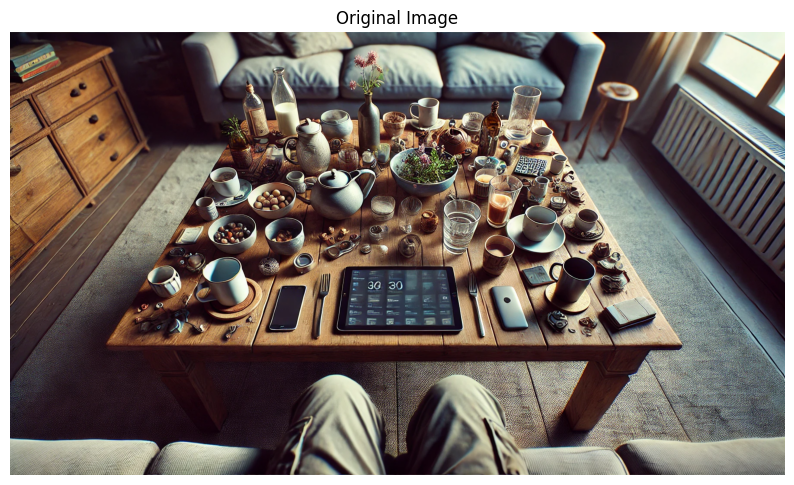

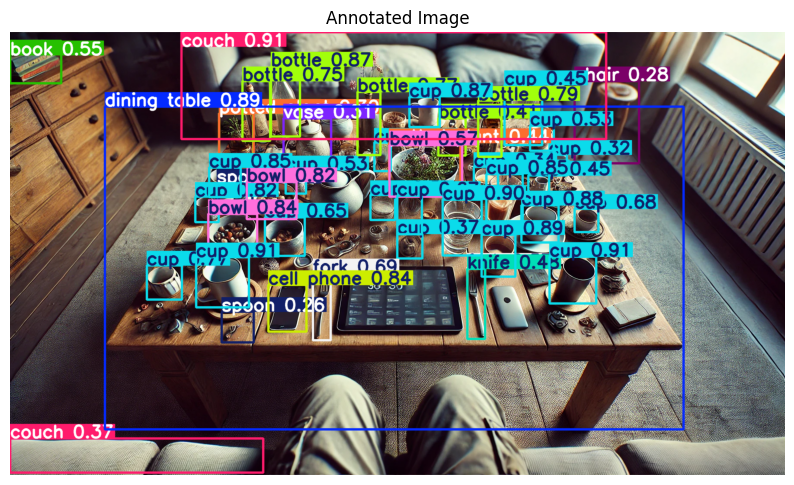

In [3]:
# Load an image using OpenCV
image_path = 'ai1.webp'
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Display the original image
display_image(image, title='Original Image')

# Annotate the image with detection results
annotated_image = results[0].plot()

# Display the annotated image
display_image(annotated_image, title='Annotated Image')


In [4]:
# Iterate over detected objects
for result in results:
    for box in result.boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        # Extract confidence score
        confidence = box.conf[0]
        # Extract class label
        class_id = box.cls[0]
        class_name = model.names[int(class_id)]
        print(f'Detected {class_name} with confidence {confidence:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]')


Detected couch with confidence 0.91 at [396, 1, 1378, 247]
Detected cup with confidence 0.91 at [430, 520, 553, 637]
Detected cup with confidence 0.91 at [1247, 520, 1355, 628]
Detected cup with confidence 0.90 at [1000, 387, 1090, 516]
Detected dining table with confidence 0.89 at [219, 173, 1557, 918]
Detected cup with confidence 0.89 at [1090, 468, 1169, 566]
Detected cup with confidence 0.88 at [1182, 400, 1268, 487]
Detected cup with confidence 0.87 at [923, 150, 993, 219]
Detected bottle with confidence 0.87 at [603, 80, 670, 241]
Detected cup with confidence 0.85 at [1101, 328, 1185, 454]
Detected cup with confidence 0.85 at [461, 313, 533, 381]
Detected bowl with confidence 0.84 at [458, 420, 571, 514]
Detected cell phone with confidence 0.84 at [597, 585, 685, 693]
Detected bowl with confidence 0.82 at [547, 346, 662, 432]
Detected cup with confidence 0.82 at [429, 380, 482, 440]
Detected bottle with confidence 0.79 at [1083, 159, 1136, 288]
Detected cup with confidence 0.77 a

REAL-TIME AUDIO

In [2]:
import sounddevice as sd
import numpy as np
import whisper
from pydub import AudioSegment
import os
from pynput import keyboard

# Initialize the Whisper model
model = whisper.load_model("large-v3-turbo")

recording = None
sample_rate = 44100  # Sample rate in Hz

def record_audio(sample_rate=44100):
    """Start recording audio from the microphone."""
    print("Recording...")
    global recording
    recording = sd.rec(int(60 * sample_rate), samplerate=sample_rate, channels=1, dtype='int16')
    print("Recording in progress... Press 's' to stop.")

def stop_recording_and_process():
    """Stop recording, save as WAV, and transcribe audio."""
    print("Stopping recording...")
    sd.stop()
    file_path = save_as_wav(np.array(recording), sample_rate)
    transcribe_audio(file_path)
    print("Press 'r' to start a new recording or 'q' to quit.")

def save_as_wav(audio_data, sample_rate=44100, file_name='output.wav'):
    """Save recorded audio as a WAV file."""
    audio_segment = AudioSegment(
        data=audio_data.tobytes(),
        sample_width=audio_data.dtype.itemsize,
        frame_rate=sample_rate,
        channels=1
    )
    audio_segment.export(file_name, format='wav')
    return file_name

def transcribe_audio(file_path):
    """Transcribe the audio file using Whisper."""
    result = model.transcribe(file_path)
    print("Transcription:", result['text'])

def on_press(key):
    """Handle keypress events."""
    global recording
    try:
        if key.char == 'r' and recording is None:
            record_audio(sample_rate)
        elif key.char == 's' and recording is not None:
            stop_recording_and_process()
            recording = None
        elif key.char == 'q':
            print("Exiting...")
            return False  # Stop the listener
    except AttributeError:
        pass

def main():
    print("Press 'r' to start recording, 's' to stop recording, and 'q' to quit.")
    with keyboard.Listener(on_press=on_press) as listener:
        listener.join()

if __name__ == "__main__":
    main()


Press 'r' to start recording, 's' to stop recording, and 'q' to quit.
Recording...
Recording in progress... Press 's' to stop.
Stopping recording...


/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Hello, how are you? Hello, how are you?
Press 'r' to start a new recording or 'q' to quit.
Recording...
Recording in progress... Press 's' to stop.
Stopping recording...


/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Guess they're home. Guess they're home.
Press 'r' to start a new recording or 'q' to quit.
Recording...
Recording in progress... Press 's' to stop.
Stopping recording...


/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  Can you pick up the glass from the table? Can you pick up the glass?
Press 'r' to start a new recording or 'q' to quit.
Exiting...


In [3]:
import sounddevice as sd
import numpy as np

sample_rate = 16000
silence_threshold = 0.001  # Lowered for increased sensitivity
chunk_duration = 1

def detect_speech(audio_chunk):
    rms = np.sqrt(np.mean(audio_chunk ** 2))
    print(f"RMS: {rms}")
    return rms > silence_threshold

def record_audio():
    while True:
        audio_chunk = sd.rec(int(chunk_duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
        sd.wait()
        if detect_speech(audio_chunk):
            print("Detected speech!")
        else:
            print("Silence...")

record_audio()


RMS: 0.0005475478828884661
Silence...
RMS: 0.005335547029972076
Detected speech!
RMS: 0.0040758103132247925
Detected speech!
RMS: 0.0022679013200104237
Detected speech!
RMS: 0.0014637010172009468
Detected speech!
RMS: 0.0005541444406844676
Silence...


KeyboardInterrupt: 

In [10]:
import sounddevice as sd
import numpy as np
import whisper, os, time
from pydub import AudioSegment


# Initialize the Whisper model
model = whisper.load_model("large-v3-turbo")

# Parameters
sample_rate = 16000
silence_threshold = 0.001  # Lowered for sensitivity
chunk_duration = 1  # Duration of each audio chunk (seconds)
audio_buffer = []  # To store speech audio chunks
silence_tolerance = 4 # Max silence duration (seconds) before processing

def detect_speech(audio_chunk):
    """Detect if audio contains speech based on RMS."""
    rms = np.sqrt(np.mean(audio_chunk ** 2))
    # print(f"RMS: {rms}")  # Debugging
    return rms > silence_threshold

def save_audio_and_transcribe(audio_data):
    """Save buffered audio to a WAV file and transcribe it."""
    print("Processing detected speech...")
    
    # Save audio to WAV
    file_name = "detected_speech.wav"
    audio_segment = AudioSegment(
        data=(np.concatenate(audio_data) * 32767).astype(np.int16).tobytes(),
        sample_width=2,
        frame_rate=sample_rate,
        channels=1
    )
    audio_segment.export(file_name, format="wav")

    # Transcribe using Whisper
    result = model.transcribe(file_name)
    print("Transcription:", result['text'])

    # Cleanup
    os.remove(file_name)

def record_audio():
    """Continuously record and process speech with silence tolerance."""
    global audio_buffer
    print("Listening for speech...")
    silence_start_time = None  # To track when silence begins

    while True:
        # Record a chunk of audio
        audio_chunk = sd.rec(int(chunk_duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
        sd.wait()

        if detect_speech(audio_chunk):
            # print("Detected speech! Adding chunk to buffer...")
            audio_buffer.append(audio_chunk)
            silence_start_time = None  # Reset silence timer
        else:
            if audio_buffer:
                # Start silence timer if not already started
                if silence_start_time is None:
                    silence_start_time = time.time()
                
                # Check if silence duration exceeds tolerance
                if time.time() - silence_start_time >= silence_tolerance:
                    print("Silence tolerance exceeded. Processing audio...")
                    save_audio_and_transcribe(audio_buffer)
                    audio_buffer = []  # Clear buffer for the next speech
                    silence_start_time = None  # Reset silence timer

record_audio()


/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_locat

Listening for speech...
Silence tolerance exceeded. Processing audio...
Processing detected speech...


/home/hamna/Documents/YOLO/yolo_env/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  I guess I have commented all of the useless print lines now. I'm so sleepy. I don't know why am I so sleepy.


KeyboardInterrupt: 